# K-Mean Clustering

In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
import pickle

# Load Dataframe

In [16]:
# load resource_priority_df from a file
with open('pickles/resource_priority_df.pickle', 'rb') as f:
    resource_priority_df = pickle.load(f)
    
# load ability_priority_df from a file
with open('pickles/ability_priority_df.pickle', 'rb') as f:
    ability_priority_df = pickle.load(f)
    
# load lane_info_df from a file
with open('pickles/lane_info_df.pickle', 'rb') as f:
    map_movement_df = pickle.load(f)


In [17]:
print(len(resource_priority_df))
X_rp = resource_priority_df[resource_priority_df['hero_id'] == hero_id]
print((X_rp))
print((ability_priority_df))
print((map_movement_df))

100320
         match_id  team  hero_id  player_slot  xpm_priority  gold_priority
291    7083305097     1        7            1      0.148715       0.129923
528    7082722396     0        7          131      0.216134       0.153690
910    7082204525     1        7            0      0.197775       0.160792
1230   7081372567     1        7            0      0.225693       0.214029
1260   7081318183     1        7            0      0.180175       0.133621
1680   7080700633     1        7            0      0.161632       0.124876
1712   7080674955     1        7            2      0.139628       0.132673
1894   7080323641     1        7            4      0.173804       0.132628
1961   7080055687     1        7            1      0.170518       0.147240
2154   7079723265     1        7            4      0.201607       0.185646
2220   7079651268     1        7            0      0.129612       0.132335
2248   7079633624     0        7          131      0.143247       0.110457
2291   7079594677 

# Function for visualizing graph

In [18]:
def show_cluster_graph(scaled_df, clustered_data, title, hero_id):
    plt.scatter(scaled_df[:, 0], scaled_df[:, 1], c=clustered_data)
    plt.title(title + str(hero_id))
    plt.show()

In [19]:
def show_vertical_bar_graph(clustered_data, title, x_label, y_label, features_label):
    position_assignments = [features_label[label] for label in clustered_data]
    position_counts = {label: position_assignments.count(label) for label in features_label.values()}
    plt.bar(position_counts.keys(), position_counts.values())
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

# Select a hero for calculation

In [20]:
hero_id = 7  # earthshaker hero id = 7

# K-Mean -- Resource Prioritization

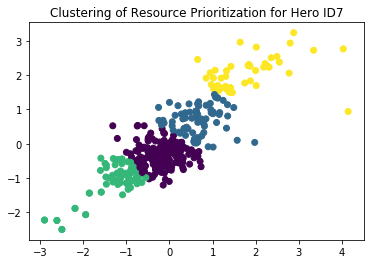

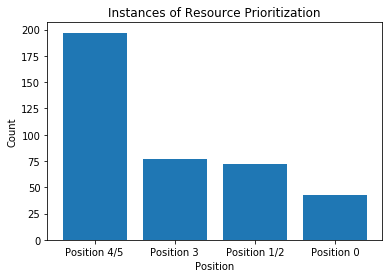

In [21]:
X_rp = resource_priority_df[resource_priority_df['hero_id'] == hero_id]

scale = StandardScaler()
scaled_df_rp = scale.fit_transform(X_rp[['xpm_priority', 'gold_priority']])
    
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_df_rp)
target_hero_roles_rp = kmeans.labels_

show_cluster_graph(scaled_df_rp, target_hero_roles_rp, "Clustering of Resource Prioritization for Hero ID", hero_id)
position_labels = {0:"Position 4/5", 1:"Position 3", 2:"Position 1/2", 3:"Position 0"}
show_vertical_bar_graph(target_hero_roles_rp, 'Instances of Resource Prioritization', 'Position', 'Count', position_labels)

# K-Mean -- Ability Prioritization

In [22]:
ability_priority_df.dropna(inplace=True)

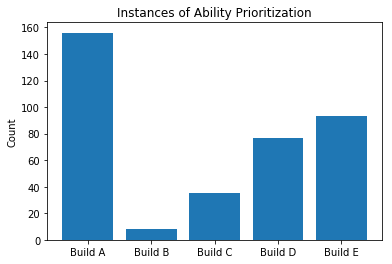

In [28]:
scale = StandardScaler()
scaled_df_ap = scale.fit_transform(ability_priority_df[['A1', 'A2', 'A3', 'A4']])

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_df_ap)
target_hero_roles_ap = kmeans.labels_

# Note that build names here are kept consistent with paper
ability_labels = {0:"Build A", 1:"Build B", 2:"Build C", 3:"Build D", 4:"Build E"}
show_vertical_bar_graph(target_hero_roles_ap, "Instances of Ability Prioritization", "", "Count", ability_labels)

# K-Mean -- Map Movement

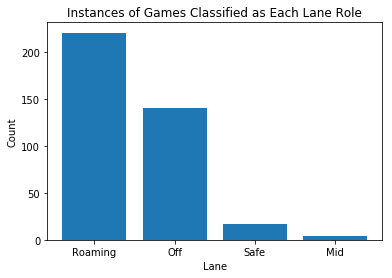

In [24]:
scale = StandardScaler()
scaled_df_lane = scale.fit_transform(map_movement_df[['off', 'mid', 'safe', 'roaming']])

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_df_lane)
target_hero_roles_mm = kmeans.predict(scaled_df_lane)

lane_labels = {0:"Roaming", 1:"Off", 2:"Safe", 3:"Mid"}
show_vertical_bar_graph(target_hero_roles_mm, "Instances of Games Classified as Each Lane Role", "Lane", "Count", lane_labels)

# Ensemble using Voting-based

In [27]:
# add match_ids to labels
resource_priority_kmean = pd.DataFrame({'match_id': X_rp['match_id'], 'labels': target_hero_roles_rp})
ability_priority_kmean = pd.DataFrame({'match_id': ability_priority_df['match_id'], 'labels': target_hero_roles_ap})
map_movement_kmean = pd.DataFrame({'match_id': map_movement_df['match_id'], 'labels': target_hero_roles_mm})

# save resource_priority_kmean to a file
with open('pickles/results_RP_kmean.pickle', 'wb') as f:
    pickle.dump(resource_priority_kmean, f)

# save ability_priority_kmean to a file
with open('pickles/results_AP_kmean.pickle', 'wb') as f:
    pickle.dump(ability_priority_kmean, f)  
    
# save map_movement_kmean to a file
with open('pickles/results_MM_kmean.pickle', 'wb') as f:
    pickle.dump(map_movement_kmean, f)  